In [10]:
import yt
from yt import derived_field

import numpy as np 

from astropy.table import Table
import astropy.units as u
from matplotlib.colors import LogNorm

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
import matplotlib.pyplot as plt
import matplotlib.lines as lines

import cmasher as cmr

import os
os.sys.path.insert(0, '/Users/ctrap/OneDrive/Documents/GitHub/foggie/foggie')

import h5py

from foggie.utils.foggie_load import *


In [13]:
from foggie.clumps.clump_finder import *


def convert_to_ucg(ds,data_source,smooth=False):
    uniform_refinement_level = int(np.round(data_source["index","grid_level"].max()))
    disk_left,disk_right = get_clump_bbox(data_source)
    disk_left[0] = disk_left[0]-2*ds.units.kpc
    disk_left[1] = disk_left[1]-2*ds.units.kpc
    disk_left[2] = disk_left[2]-2*ds.units.kpc
    disk_right[0] = disk_right[0]+2*ds.units.kpc
    disk_right[1] = disk_right[1]+2*ds.units.kpc
    disk_right[2] = disk_right[2]+2*ds.units.kpc
    print("ledge=",disk_left)
    print("redge=",disk_right)
    print("refine_by = ",ds.refine_by)
    print("domian dimensions are:",ds.domain_dimensions)
    print(ds.domain_left_edge.in_units('kpc'))
    print(ds.domain_right_edge.in_units('kpc'))

    domain_dimensions = ds.domain_dimensions #256x256x256
    domain_dimensions_kpc = np.subtract(ds.domain_right_edge.in_units('kpc') , ds.domain_left_edge.in_units('kpc'))
    subdomain_dimensions_kpc = [0,0,0]
    for i in [0,1,2]: subdomain_dimensions_kpc[i] = disk_right[i]-disk_left[i]
    domain_conversion = np.divide(domain_dimensions, domain_dimensions_kpc)
    subdomain_dimensions = np.array(np.multiply(domain_conversion, subdomain_dimensions_kpc))


    dims = subdomain_dimensions * ds.refine_by**uniform_refinement_level
    dims = [int(np.round(dims[0])) , int(np.round(dims[1])), int(np.round(dims[2]))]

   # dims = [64,64,64]
    print("dims are",dims)
    if smooth:
        cg = ds.smoothed_covering_grid(uniform_refinement_level, left_edge=disk_left, dims=dims, data_source = data_source)
    else:
        cg = ds.covering_grid(uniform_refinement_level, left_edge=disk_left, dims=dims, data_source = data_source)
        
    return cg

In [11]:
#Load in the snapshot
code_dir = '/Users/ctrapp/Documents/GitHub/foggie/'
data_dir = '/Volumes/FoggieCam/foggie_halos/'

gal_id = "008508" ## Tempest
snapnum = "DD0967"

if gal_id=="008508":
    gal_name = "Tempest"
if gal_id=="005036":
    gal_name = "Maelstrom"
if gal_id == "002392":
    gal_name = "Hurricane"
if gal_id=="005016":
    gal_name = "Squall"

GalName=gal_name

gal_name+="_"+snapnum

#refinement = "nref11n"
refinement = "nref11c_nref9f"
snap_name = data_dir + "halo_"+gal_id+"/"+refinement+"/"+snapnum+"/"+snapnum
#snap_name = data_dir + "halo_"+gal_id+"/natural/"+snapnum+"/"+snapnum

trackname = code_dir+"/foggie/halo_tracks/"+gal_id+"/nref11n_selfshield_15/halo_track_200kpc_nref9"

if refinement=="natural" or refinement=="nref11n":
    gal_name+="_natural"

halo_c_v_name = code_dir+"/foggie/halo_infos/"+gal_id+"/"+refinement+"/halo_c_v"

#particle_type_for_angmom = 'young_stars' ##Currently the default
particle_type_for_angmom = 'gas' #Should be defined by gas with Temps below 1e4 K

catalog_dir = code_dir + 'foggie/halo_infos/' + gal_id + '/'+refinement+'/'
#smooth_AM_name = catalog_dir + 'AM_direction_smoothed'
smooth_AM_name = None


ds, refine_box = foggie_load(snap_name, trackname, halo_c_v_name=halo_c_v_name, do_filter_particles=True,disk_relative=True,particle_type_for_angmom=particle_type_for_angmom,smooth_AM_name = smooth_AM_name)

yt : [INFO     ] 2025-09-18 12:52:57,646 Parameters: current_time              = 274.56652781829
yt : [INFO     ] 2025-09-18 12:52:57,646 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2025-09-18 12:52:57,646 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-09-18 12:52:57,647 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-09-18 12:52:57,647 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-09-18 12:52:57,647 Parameters: current_redshift          = 1.0043884467376
yt : [INFO     ] 2025-09-18 12:52:57,647 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2025-09-18 12:52:57,647 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2025-09-18 12:52:57,648 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-09-18 12:52:57,648 Parameters: hubble_constant           = 0.695


Opening snapshot /Volumes/FoggieCam/foggie_halos/halo_008508/nref11c_nref9f/DD0967/DD0967


Parsing Hierarchy : 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5908/5908 [00:00<00:00, 32774.33it/s]
yt : [INFO     ] 2025-09-18 12:52:57,873 Gathering a field list (this may take a moment.)
yt : [WARNING  ] 2025-09-18 12:52:58,310 The young_stars particle filter already exists. Overriding.
yt : [WARNING  ] 2025-09-18 12:52:58,314 The young_stars3 particle filter already exists. Overriding.
yt : [WARNING  ] 2025-09-18 12:52:58,319 The young_stars8 particle filter already exists. Overriding.
yt : [WARNING  ] 2025-09-18 12:52:58,322 The old_stars particle filter already exists. Overriding.
yt : [WARNING  ] 2025-09-18 12:52:58,326 The stars particle filter already exists. Overriding.
yt : [WARNING  ] 2025-09-18 12:52:58,330 The dm 

get_refine_box: using this location:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.00438844674 0.491497 0.481944 0.503607 0.493497 0.483944 0.505607    9
Found halo_c_v file: /Users/ctrapp/Documents/GitHub/foggie//foggie/halo_infos/008508/nref11c_nref9f/halo_c_v
Using halo_c_v catalog file:  /Users/ctrapp/Documents/GitHub/foggie//foggie/halo_infos/008508/nref11c_nref9f/halo_c_v  for center style  catalog
Pulling halo center from catalog file
halo center in kpc:  [35353.348781   34666.28976357 36223.74219945] kpc
halo velocity in km/s:  [ -28.43609939 -146.54126284   59.01444901] km/s
filtering young_stars particles...
filtering young_stars3 particles...
filtering young_stars8 particles...
filtering old_stars particles...
filtering stars particles...
filtering dm particles...
using particle type  gas  to derive angular momentum
found angular momentum vector


In [14]:
#Load in the clumps
from foggie.clumps.clump_finder.utils_clump_finder import add_cell_id_field
from foggie.clumps.clump_finder.utils_clump_finder import add_leaf_id_field

clump_dir = '/Users/ctrapp/Documents/foggie_analysis/clump_project/clump_catalog/'
hierarchy_file = clump_dir + GalName+"_"+snapnum+"_"+run+"_ClumpTree.h5"

add_cell_id_field(ds)
add_leaf_id_field(ds,hierarchy_file)

In [15]:
#Create the UCGs for each parameter
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

plot_units = "cm**(-2)"
display_units = "dimensionless"

print("Creating simple ucg...")
ucg_list = create_simple_ucg(ds, refine_box, [('gas','density'),('gas','leaf_id')], 11, split_method=["copy","copy"],merge_method = ["max","max"])

print("Projecting...")
density_projection = np.sum( ucg_list[0], axis=2)
leaf_id_projection = np.max( ucg_list[1], axis=2)


Creating simple ucg...


yt : [WARNING  ] 2025-09-18 12:54:15,482 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'
yt : [WARNING  ] 2025-09-18 12:54:15,847 Field ('gas', 'leaf_id') was added without specifying units or dimensions, auto setting units to 'dimensionless'


Projecting...


In [92]:
#Build util in synth image gen that adds all these fields
import unyt as u

projection_dict = {'x': ('y', 'z', 'x'), 'y':('z', 'x', 'y'), 'z':('x', 'y', 'z')} # which axes are projected for which line of sight args.projection
c = 3e5 * u.km / u.s  # km/s
H0 = 70. * u.km / u.s / u.Mpc  # km/s/Mpc Hubble's constant
h = 4.135667696e-15 * u.eV * u.s #eV * s
Mpc_to_m = 3.08e22
Mpc_to_cm = Mpc_to_m * 100
kpc_to_cm = Mpc_to_cm / 1000
kb = 8.617333262e-5 * u.eV / u.K
m_e = 9.1094*np.power(10.,-28.) * u.g #grams
e = 4.8032*np.power(10.,-10.) * u.statC #cm^(3/2) * g^(1/2) * s^(-1)
amu = 1.6735575*np.power(10.,-24) * u.g

arcsec_to_rad = 1./60./60. * np.pi/180.
rad_to_arcsec = 180. * 3600. / np.pi


def get_inclination_rot_arr(inclination,position_angle):
    '''
    Calculate the rotation matrix for converting from the original coordinate system
    into a new basis defined by the inclination and position angle.
    Modified from foggie_load's definition for disk orientation
    '''

    inclination = inclination * np.pi/180. #convert to radians
    position_angle = position_angle * np.pi/180. #convert to radians
    z = np.array([np.cos(np.pi/2. - inclination)*np.cos(position_angle),np.cos(np.pi/2. - inclination)*np.sin(position_angle),np.sin(np.pi/2. - inclination)])
    
    np.random.seed(99)
    x = np.random.randn(3)            # take a random vector
    x -= x.dot(z) * z       # make it orthogonal to L
    x /= np.linalg.norm(x)            # normalize it
    y = np.cross(z, x)           # cross product with L

    # Calculate the rotation matrix for converting from original coordinate system
    # into this new basis
    xhat = np.array([1,0,0])
    yhat = np.array([0,1,0])
    zhat = np.array([0,0,1])
    transArr0 = np.array([[xhat.dot(x), xhat.dot(y), xhat.dot(z)],
                          [yhat.dot(x), yhat.dot(y), yhat.dot(z)],
                          [zhat.dot(x), zhat.dot(y), zhat.dot(z)]])
    
    return np.linalg.inv(transArr0) , z

def get_observer_velocity(ds, source_cut, observer_distance, inclination, position_angle):

    res_r = 0.274 * u.kpc #1 cell
    max_r = 1.5*observer_distance + res_r
    print("max_r=",max_r)
    n_bins = int(np.round(max_r / res_r))
    extrema={('gas','radius_corrected'):[0.0,max_r]}
    extrema=None
    fields = [('gas','vtan_disk')]
    bin_fields = [('gas','radius_corrected')]
    weight_field = ("gas","density")
    units = {('gas','radius_corrected'): 'kpc',  ('gas','vtan_disk'):'km/s'}
    binned_vtan = yt.create_profile(source_cut , bin_fields, fields, units = units, accumulation=False,extrema=extrema,n_bins=n_bins,weight_field=weight_field)

    mask = ((binned_vtan.x > observer_distance-res_r) & (binned_vtan.x < observer_distance+res_r))
    observer_speed = np.mean(binned_vtan['gas','vtan_disk'][mask])

    x_disk = np.cos(position_angle) * np.cos(inclination) #Double check inclination is correct?
    y_disk = np.sin(position_angle) * np.cos(inclination)

    observer_velocity = np.array([-y_disk,x_disk,0]) * observer_speed

    return observer_velocity

    

  
    

def _pseudo_pos_x_projected(field,data,observer_distance,rot_arr):
    '''
    Psuedo-function for adding a pojrected x position field
    '''
    old_x = data['gas','x_disk'].in_units('kpc')
    old_y = data['gas','y_disk'].in_units('kpc')
    old_z = data['gas','z_disk'].in_units('kpc')

    
    return rot_arr[0][0]*old_x+rot_arr[0][1]*old_y+rot_arr[0][2]*old_z


def _pseudo_pos_y_projected(field,data,observer_distance,rot_arr):
    '''
    Psuedo-function for adding a pojrected y position field
    '''
    old_x = data['gas','x_disk'].in_units('kpc')
    old_y = data['gas','y_disk'].in_units('kpc')
    old_z = data['gas','z_disk'].in_units('kpc') 

    
    return rot_arr[1][0]*old_x+rot_arr[1][1]*old_y+rot_arr[1][2]*old_z

def _pseudo_pos_z_projected(field,data,observer_distance,rot_arr):
    '''
    Psuedo-function for adding a projected z position field
    Corresponds to distance from the observer.
    '''
    old_x = data['gas','x_disk'].in_units('kpc')
    old_y = data['gas','y_disk'].in_units('kpc')
    old_z = data['gas','z_disk'].in_units('kpc') 
    
    return rot_arr[2][0]*old_x+rot_arr[2][1]*old_y+rot_arr[2][2]*old_z + observer_distance.in_units('kpc')


def _pseudo_v_doppler(field,data,Lhat,observer_velocity= None):
    '''
    Psuedo-function for adding the projected velocity field.
    Accounts for hubble flow based on distance to observer.
    '''
    hubble_flow = H0 * data['gas','pos_z_projected'].in_units('Mpc')
    projected_velocity = data['gas','vx_disk'] * Lhat[0] + data['gas','vy_disk'] * Lhat[1] + data['gas','vz_disk'] * Lhat[2]
    projected_velocity = projected_velocity + hubble_flow

    if observer_velocity is not None:
        projected_velocity = projected_velocity - observer_velocity[0] * Lhat[0] - observer_velocity[1] * Lhat[1] - observer_velocity[2] * Lhat[2]

    return projected_velocity

observer_distance = 7 * u.kpc #~Solar Circle
inclination = 0 # in disk
position_angle = 0 # can vary?
rot_arr, Lhat = get_inclination_rot_arr(inclination,position_angle)
#observer_velocity = get_observer_velocity(ds,refine_box, observer_distance, inclination, position_angle)
observer_velocity=None #Leave in GSR

north_vector=ds.z_unit_disk

print("Observer distance=",observer_distance)
_pos_x_projected = partial(_pseudo_pos_x_projected, observer_distance = observer_distance, rot_arr = rot_arr )
_pos_y_projected = partial(_pseudo_pos_y_projected, observer_distance = observer_distance, rot_arr = rot_arr )
_pos_z_projected = partial(_pseudo_pos_z_projected, observer_distance = observer_distance, rot_arr = rot_arr )

ds.add_field(
        ('gas', 'pos_x_projected'),
          function=_pos_x_projected,
          sampling_type='cell',
          force_override=True
)

ds.add_field(
        ('gas', 'pos_y_projected'),
          function=_pos_y_projected,
          sampling_type='cell',
          force_override=True
)

ds.add_field(
        ('gas', 'pos_z_projected'),
          function=_pos_z_projected,
          sampling_type='cell',
          force_override=True
)

print("Source_cut projected_z=",np.min(refine_box['gas','pos_z_projected'].in_units('kpc')),np.max(refine_box['gas','pos_z_projected'].in_units('kpc')))

_v_doppler = partial(_pseudo_v_doppler, Lhat=Lhat, observer_velocity = observer_velocity )

ds.add_field(
        ('gas', 'v_doppler'),
          function=_v_doppler,
          sampling_type='cell',
          force_override=True
)

print("Added doppler velocity...")
print(refine_box['gas','v_doppler'])

Observer distance= 7 kpc
Source_cut projected_z= -115.13347080873663 kpc 127.27496778159706 kpc
Added doppler velocity...
[5023858.37356026 5026835.93720993 5034022.41223112 ...   35260.74452949
 -145170.21882375 -114550.01217709] cm/s


In [74]:


def load_clump_stats(ds,source_cut,verbose=False):
    leaf_ids = source_cut['gas','leaf_id']
    gas_mass = source_cut['gas','cell_mass']
    cell_volume = source_cut['gas','cell_volume']
    radial_velocity = source_cut['gas','radial_velocity_corrected']
    doppler_velocity = source_cut['gas','v_doppler']
    h_p0_number_density = source_cut['gas','H_p0_number_density']
    o_p6_number_density = source_cut['gas','O_p5_number_density']
    mg_p2_number_density = source_cut['gas','Mg_p1_number_density']

    clump_mass = np.zeros((int(np.max(leaf_ids.v+1))))
    clump_volume = np.copy(clump_mass)
    clump_radius = np.copy(clump_mass)
    clump_rvel  = np.copy(clump_mass)
    clump_vdoppler = np.copy(clump_mass)
    clump_h_p0  = np.copy(clump_mass)
    clump_o_p6  = np.copy(clump_mass)
    clump_mg_p2 = np.copy(clump_mass)
    
    for leaf_id in np.unique(leaf_ids):
        if leaf_id<0: continue
        mask = (leaf_ids==leaf_id)
        clump_mass[int(leaf_id)] = np.sum(gas_mass[mask].in_units('Msun'))
        clump_volume[int(leaf_id)] = np.sum(cell_volume[mask].in_units('kpc**3'))
        clump_radius[int(leaf_id)] = np.power(clump_volume[int(leaf_id)],1./3.)
        #Mass Weighted
        clump_rvel[int(leaf_id)] = np.sum(np.multiply(gas_mass[mask],radial_velocity[mask].in_units('km/s'))) / np.sum(gas_mass[mask])
        clump_vdoppler[int(leaf_id)] = np.sum(np.multiply(gas_mass[mask],doppler_velocity[mask].in_units('km/s'))) / np.sum(gas_mass[mask])

        #Volume Weighted
        weight = cell_volume[mask]
        norm = np.sum(weight)
        clump_h_p0[int(leaf_id)]  = np.sum(np.multiply(weight, h_p0_number_density[mask].in_units("cm**-3"))) / norm
        clump_o_p6[int(leaf_id)]  = np.sum(np.multiply(weight, o_p6_number_density[mask].in_units("cm**-3"))) / norm
        clump_mg_p2[int(leaf_id)] = np.sum(np.multiply(weight, mg_p2_number_density[mask].in_units("cm**-3"))) / norm

        if verbose:
            print("For Leaf",int(leaf_id))
            print(f"    Clump Mass      = {clump_mass[int(leaf_id)]:.3e} Msun")
            print(f"    Clump Volume    = {clump_volume[int(leaf_id)]:.3e} kpc^3")
            print(f"    Clump ~Radius   = {clump_radius[int(leaf_id)]:.3e} kpc")
            print(f"    Rad. Vel.       = {clump_rvel[int(leaf_id)]:.3f} km/s")
            print(f"    Doppler. Vel.   = {clump_vdoppler[int(leaf_id)]:.3f} km/s")
            print(f"    HI Num. Dens.   = {clump_h_p0[int(leaf_id)]:.3e} cm^-3")
            print(f"    OVI Num. Dens.  = {clump_o_p6[int(leaf_id)]:.3e} cm^-3")
            print(f"    MgII Num. Dens. = {clump_mg_p2[int(leaf_id)]:.3e} cm^-3")

            #HVC and IVC descriptions are stupid and pointless from a theoretical point of view
            #HVC Doppler vel > 90
            #IVC: 90 > Doppler vel > 60

    return clump_mass,clump_radius,clump_rvel,clump_vdoppler,clump_h_p0,clump_o_p6,clump_mg_p2




clump_mass,clump_radius,clump_rvel,clump_vdoppler,clump_h_p0,clump_o_p6,clump_mg_p2 = load_clump_stats(ds,refine_box,verbose=True)


For Leaf 54
    Clump Mass      = 1.174e+07 Msun
    Clump Volume    = 1.283e-01 kpc^3
    Clump ~Radius   = 5.044e-01 kpc
    Rad. Vel.       = -75.609 km/s
    Doppler. Vel.   = -70.990 km/s
    HI Num. Dens.   = 2.804e+00 cm^-3
    OVI Num. Dens.  = 0.000e+00 cm^-3
    MgII Num. Dens. = 8.832e-06 cm^-3
For Leaf 67
    Clump Mass      = 7.000e+03 Msun
    Clump Volume    = 3.384e+01 kpc^3
    Clump ~Radius   = 3.235e+00 kpc
    Rad. Vel.       = 394.100 km/s
    Doppler. Vel.   = 390.591 km/s
    HI Num. Dens.   = 4.917e-13 cm^-3
    OVI Num. Dens.  = 5.311e-13 cm^-3
    MgII Num. Dens. = 0.000e+00 cm^-3
For Leaf 69
    Clump Mass      = 1.563e+05 Msun
    Clump Volume    = 1.889e+02 kpc^3
    Clump ~Radius   = 5.738e+00 kpc
    Rad. Vel.       = 69.742 km/s
    Doppler. Vel.   = 37.766 km/s
    HI Num. Dens.   = 2.949e-11 cm^-3
    OVI Num. Dens.  = 1.178e-10 cm^-3
    MgII Num. Dens. = 0.000e+00 cm^-3
For Leaf 72
    Clump Mass      = 3.056e+04 Msun
    Clump Volume    = 4.928e+00 

In [83]:
def print_clump_stats(mass,radius,rvel,vdoppler,h_p0,o_p6,mg_p2):
            print(f"    Clump Mass      = {mass:.3e} Msun")
            print(f"    Clump ~Radius   = {radius:.3e} kpc")
            print(f"    Rad. Vel.       = {rvel:.3e} km/s")
            print(f"    Doppler. Vel.   = {vdoppler:.3f} km/s")
            print(f"    HI Num. Dens.   = {h_p0:.3e} cm^-3")
            print(f"    OVI Num. Dens.  = {o_p6:.3e} cm^-3")
            print(f"    MgII Num. Dens. = {mg_p2:.3e} cm^-3")

hvc_leaf_ids = np.where(np.abs(clump_vdoppler)>=90)
ivc_leaf_ids = np.where( (np.abs(clump_vdoppler)>=60) & (np.abs(clump_vdoppler)<90) )
lvc_leaf_ids = np.where((np.abs(clump_vdoppler)<60) & (clump_mass>0))

for leaf_id in lvc_leaf_ids[0]:
    print("For Leaf:",leaf_id)
    print_clump_stats(clump_mass[leaf_id],clump_radius[leaf_id],clump_rvel[leaf_id],clump_vdoppler[leaf_id],clump_h_p0[leaf_id],clump_o_p6[leaf_id],clump_mg_p2[leaf_id])


For Leaf: 69
    Clump Mass      = 1.563e+05 Msun
    Clump ~Radius   = 5.738e+00 kpc
    Rad. Vel.       = 6.974e+01 km/s
    Doppler. Vel.   = 37.766 km/s
    HI Num. Dens.   = 2.949e-11 cm^-3
    OVI Num. Dens.  = 1.178e-10 cm^-3
    MgII Num. Dens. = 0.000e+00 cm^-3
For Leaf: 72
    Clump Mass      = 3.056e+04 Msun
    Clump ~Radius   = 1.702e+00 kpc
    Rad. Vel.       = 3.769e+01 km/s
    Doppler. Vel.   = -11.921 km/s
    HI Num. Dens.   = 7.663e-09 cm^-3
    OVI Num. Dens.  = 1.486e-09 cm^-3
    MgII Num. Dens. = 7.701e-17 cm^-3
For Leaf: 73
    Clump Mass      = 5.345e+04 Msun
    Clump ~Radius   = 1.683e+00 kpc
    Rad. Vel.       = -1.793e+01 km/s
    Doppler. Vel.   = -29.523 km/s
    HI Num. Dens.   = 7.307e-08 cm^-3
    OVI Num. Dens.  = 1.901e-09 cm^-3
    MgII Num. Dens. = 1.960e-14 cm^-3
For Leaf: 74
    Clump Mass      = 5.802e+05 Msun
    Clump ~Radius   = 2.746e+00 kpc
    Rad. Vel.       = -2.787e+01 km/s
    Doppler. Vel.   = -47.385 km/s
    HI Num. Dens.   = 6.3

Projecting...
Plotting...
-1.0
0.0


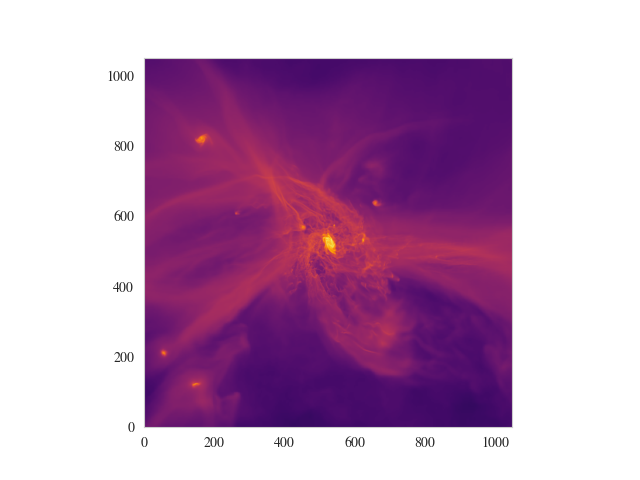

In [44]:
#2-D Plotting
%matplotlib widget
ucg_list[0][np.isnan(ucg_list[0])] = 0
ucg_list[1][np.isnan(ucg_list[1])] = -1

print("Projecting...")
density_projection = np.sum( ucg_list[0], axis=1)
leaf_id_projection = np.max( ucg_list[1], axis=1)

###Instead do projection yourself

print("Plotting...")
values_to_plot = density_projection
#values_to_plot = leaf_id_projection
values_to_display = leaf_id_projection

fig, ax = plt.subplots()
vmin = np.min(values_to_plot[values_to_plot>0])/10.
im = ax.imshow(values_to_plot, origin="lower", cmap="inferno",norm=LogNorm(vmin=vmin))

print(leaf_id_projection[0,0])
print(clump_mass[200])
cursor = mplcursors.cursor(im, hover=True)
@cursor.connect("add")
def on_add(sel):
    x, y = int(round(sel.target[0])), int(round(sel.target[1]))
    leaf_id = leaf_id_projection[x,y]
    if leaf_id>0: leaf_mass = clump_mass[leaf_id]
    else: leaf_mass=0
    sel.annotation.set_text(f"({x}, {y})\nmass={leaf_id:.3e} Msun")

In [85]:
import napari
datacubes=[]
ucg_list[0][ucg_list[0]==0] = np.min(ucg_list[0][ucg_list[0]>0])/10.

hvc_ids = np.copy(ucg_list[1])
ivc_ids = np.copy(ucg_list[1])
lvc_ids = np.copy(ucg_list[1])

hvc_ids[~np.isin(hvc_ids , hvc_leaf_ids)] = -1
ivc_ids[~np.isin(ivc_ids , ivc_leaf_ids)] = -1
lvc_ids[~np.isin(lvc_ids , lvc_leaf_ids)] = -1
 
viewer = napari.Viewer(ndisplay=3)
img_layer = viewer.add_image(np.log10(ucg_list[0]), colormap='inferno', name='Density', rendering='mip',depiction='volume',gamma=0.7)
viewer.add_image(np.round(ucg_list[1]).astype(int), colormap='inferno', name='Clump id', rendering='mip',depiction='volume',gamma=0.7)
viewer.add_image(np.round(hvc_ids).astype(int), colormap='green', name='HVCs', rendering='mip',depiction='volume',gamma=0.2,opacity=0.6)
viewer.add_image(np.round(ivc_ids).astype(int), colormap='cyan', name='IVCs', rendering='mip',depiction='volume',gamma=0.2,opacity=0.6)
viewer.add_image(np.round(lvc_ids).astype(int), colormap='magenta', name='LVCs', rendering='mip',depiction='volume',gamma=0.2,opacity=0.6)

viewer.camera.zoom=(2.5)



napari.run()

In [47]:
for leaf_id in [10278,13065,12075,10433,13097,12073,15856,15825]:
    print("Clump Mass=",clump_mass[leaf_id])

Clump Mass= 121885.7492538922
Clump Mass= 13986.392742221204
Clump Mass= 47673.98674501525
Clump Mass= 58504.949758760486
Clump Mass= 33401.07567064222
Clump Mass= 19624.356189782713
Clump Mass= 31282.94730781465
Clump Mass= 15395.242893962635


Loading Leaves...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 957/957 [00:02<00:00, 319.19it/s]


YTCutRegion (RD0042): , base_object=YTRegion (RD0042): , center=[2.21991193e+26 2.21991193e+26 2.21991193e+26] cm, left_edge=[0. 0. 0.] cm, right_edge=[4.43982386e+26 4.43982386e+26 4.43982386e+26] cm, conditionals=["obj['index','masked_field_1']"]


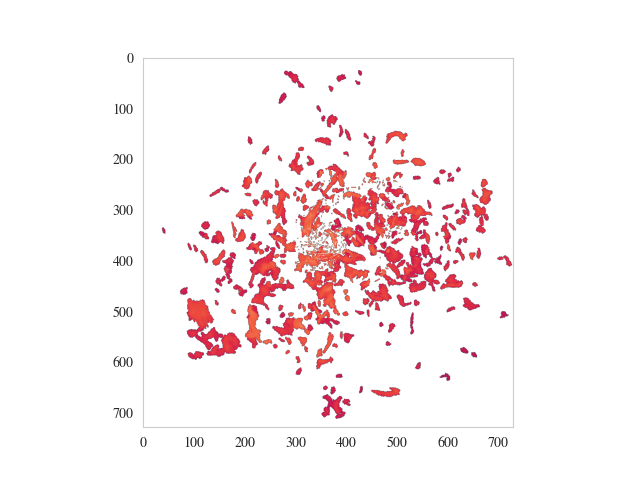

In [37]:
#Visualize Clumps

from foggie.clumps.clump_finder.utils_clump_finder import add_cell_id_field

clump_dir = '/Users/ctrapp/Documents/foggie_analysis/clump_project/clump_catalog/'
snapshot = "RD0042"
run = "nref11c_nref9f"
hierarchy_file = clump_dir + GalName+"_"+snapshot+"_"+run+"_ClumpTree.h5"

add_cell_id_field(ds)

all_leaves = load_all_leaves(ds,hierarchy_file)
print(leaf_cell_ids)

c = ds.halo_center_code
L = ds.z_unit_disk
north_vector = ds.y_unit_disk
max_r = 200. * ds.units.kpc
W = [2.*max_r,2.*max_r,2.*max_r] * ds.units.kpc
N = int(np.round(max_r.in_units('kpc').v / np.min( refine_box['gas','dx'] ).in_units('kpc').v))

density_face_on = yt.off_axis_projection(all_leaves, c,L,W,N,("density"),north_vector=north_vector,method='integrate')
plt.figure()
plt.imshow(density_face_on,norm=LogNorm(vmin=np.min(density_face_on[density_face_on>0]/10)))
plt.show()
